# Урок 9. Линейная регрессия Логистическая регрессия

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).  
Произвести расчет как с использованием intercept, так и без.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

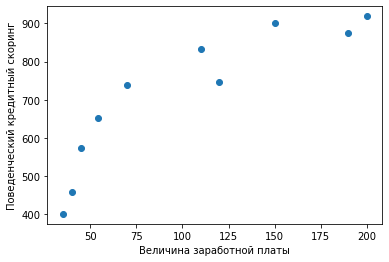

In [41]:
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

Благодоря графику видна линейная взаимосвязь между зависимой и независимой переменными  
$ ks=a+b*zp $  
Найдём коэффициент b по формуле:  
$ b=\frac{\bar{xy}-\bar{x}*\bar{y}}{\bar{x^2}-\bar{x}^2} $

In [42]:
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks))/(np.mean(zp**2) - np.mean(zp)**2)
b

2.620538882402765

Найдём величину интерсепта $ a $ которая будет показывать чему будет равна зависимая переменная, если независимая равна 0.  
Расчитаем интерсепт по формуле:  
$ a=\bar{y}-b*\bar{x}=\bar{ks}-b*\bar{zp} $

In [43]:
a = np.mean(ks) - b * np.mean(zp)
a

444.1773573243596

Линейную взаимосвязь между заработной платой и кредитным скорингом можно описать функцией:
$ y_{pred}=444.18+2.62*zp $

In [44]:
y_pred = 444.18 + 2.62 * zp
y_pred

array([535.88, 562.08, 941.98, 968.18, 548.98, 627.58, 585.66, 837.18,
       758.58, 732.38])

Рассмотрим ещё один метод нахождения коэффициентов с помощью матричного метода без использования intercept.

$ y=b_0+b_1x $  
$ Y=X*B $  
$ \begin{pmatrix}
    y_1\\
    y_2\\
    y_3
  \end{pmatrix} = 
\begin{pmatrix}
    x_1\\
    x_2\\
    x_3
  \end{pmatrix} 
  \begin{pmatrix}
    \beta_0\\
    \beta_1
  \end{pmatrix} $  
$ B=(X^T*X)^{-1}*X^T*Y $

In [45]:
x = zp.reshape((-1, 1))
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [46]:
y = ks.reshape((-1, 1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [47]:
B = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
B

array([[5.88982042]])

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). 

$ y=\beta_1x $

In [54]:
def mse_(B1, y = y, x = x, n = len(y)):
    return np.sum((B1 * x - y)**2)/ n

alpha = 1e-6

# mse = 1/n * np.sum((B1 * x - y)**2)
# mse = (2/n) * np.sum((B1 * x - y) * x)

B1 = 0.1
n = len(x)

In [63]:
for i in range(10):
    B1 -= alpha * (2/n) * np.sum((B1 * x - y) * x)
    print('B1 = {}',format(B1))

B1 = {} 3.834030908020559
B1 = {} 3.890674487605687
B1 = {} 3.94575735531379
B1 = {} 3.999322513751358
B1 = {} 4.051411780665465
B1 = {} 4.102065821590433
B1 = {} 4.151324181594987
B1 = {} 4.1992253161546635
B1 = {} 4.245806621173591
B1 = {} 4.291104462179071


In [64]:
for i in range(3000):
    B1 -= alpha * (2/n) * np.sum((B1 * x - y) * x)
    if i % 500 == 0:
        print('Iteranion = {i}, B1 = {B1}, mse = {mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteranion = 0, B1 = 4.335154202711759, mse = 89814.72217554647
Iteranion = 500, B1 = 5.889819087952619, mse = 56516.858415743845
Iteranion = 1000, B1 = 5.889820420131547, mse = 56516.8584157194
Iteranion = 1500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteranion = 2000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteranion = 2500, B1 = 5.889820420132673, mse = 56516.85841571943


In [65]:
mse_(4.335154)

89814.73085891386